# Prediction of studnet score using Linear Regression

## Importing needed packages

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Dowloading the data

In [30]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [31]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Exploration

In [7]:
# summarize the data 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot the hours against the the score, to see how linear the relationship is:

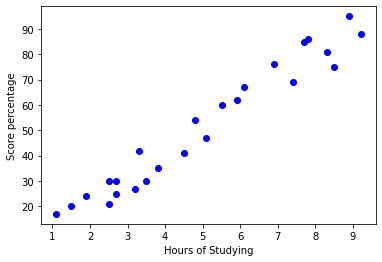

In [8]:
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours of Studying")
plt.ylabel("Score percentage")
plt.show()

#### Creating train and test dataset

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


### Train data distribution

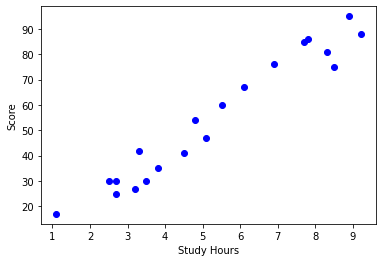

In [11]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.show()

#### Modeling
Using sklearn package to model data.

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.907717]]
Intercept:  [1.98956129]


#### Plot output
We can plot the fit line over the data

Text(0, 0.5, 'Score')

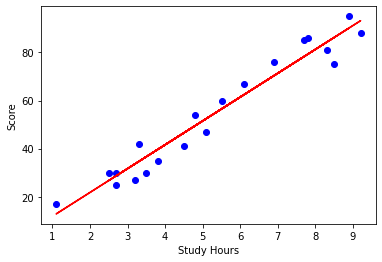

In [13]:
plt.scatter(train.Hours, train.Scores,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Study Hours")
plt.ylabel("Score")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 3.99
Residual sum of squares (MSE): 19.08
R2-score: 0.96


#### Answering the question
What will be predicted score if a student studies for 9.25 hrs/day?

In [28]:
hours = [[9.25]]
hours = np.asanyarray(hours)
pred = regr.predict(hours)
print("predicted score value is: " + str(pred[0][0]))

predicted score value is: 93.63594358289802
